
# Autoencoders

Autoencoders are a type of artificial neural network used for unsupervised learning tasks, particularly for dimensionality reduction, feature learning, and data compression. They consist of two main components:

-   **Encoder**: Compresses the input data into a lower-dimensional representation (latent space).
-   **Decoder**: Reconstructs the original data from the compressed representation.

Autoencoders are trained to minimize the difference between the input and the reconstructed output, effectively learning to capture the essential features of the data while discarding noise and irrelevant information.

## Example: Autoencoder on MNIST Dataset

To illustrate the use of autoencoders, we can apply them to the MNIST dataset, which consists of handwritten digits. The goal is to compress the images into a lower-dimensional representation and then reconstruct the original images.

-   Load the MNIST dataset

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

-   Visualize some samples from the dataset

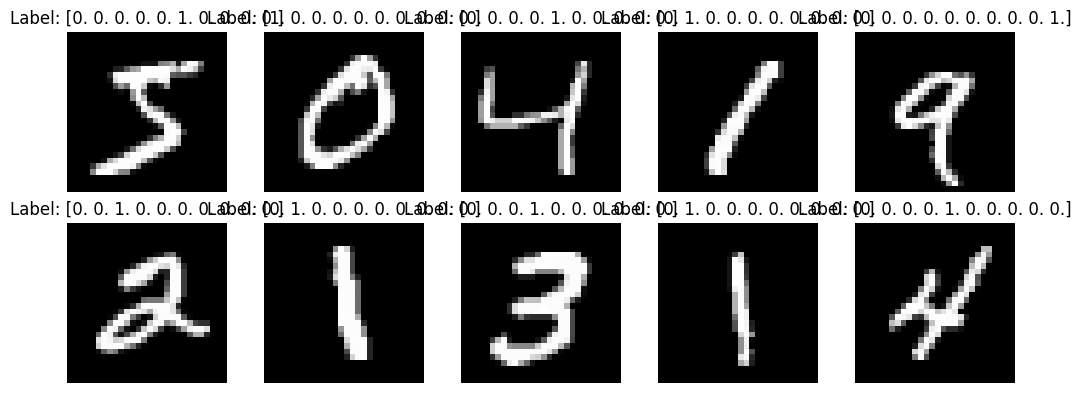

In [7]:
# Visualize some samples from the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

-   Define the autoencoder architecture

In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# Define the encoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

# Define the decoder
x = Dense(28 * 28 * 1, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_12 (Reshape)            │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

-   Train the autoencoder

In [64]:
# Train the autoencoder
autoencoder.fit(X_train,
                X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)
print("Autoencoder training completed.")

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3728 - val_loss: 0.1744
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1644 - val_loss: 0.1390
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1338 - val_loss: 0.1196
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1161 - val_loss: 0.1070
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 - val_loss: 0.0987
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0966 - val_loss: 0.0928
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0910 - val_loss: 0.0884
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0868 - val_loss: 0.0851
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0836 - val_loss: 0.0826
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815 - val_loss: 0.0808
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0795 - val_loss: 0.0793
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

-   Evaluate the autoencoder

In [65]:
# Evaluate the autoencoder
import numpy as np
reconstruction = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - reconstruction))
print(f'Reconstruction Error: {reconstruction_error:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Reconstruction Error: 0.0037


-   Visualize the reconstructed images

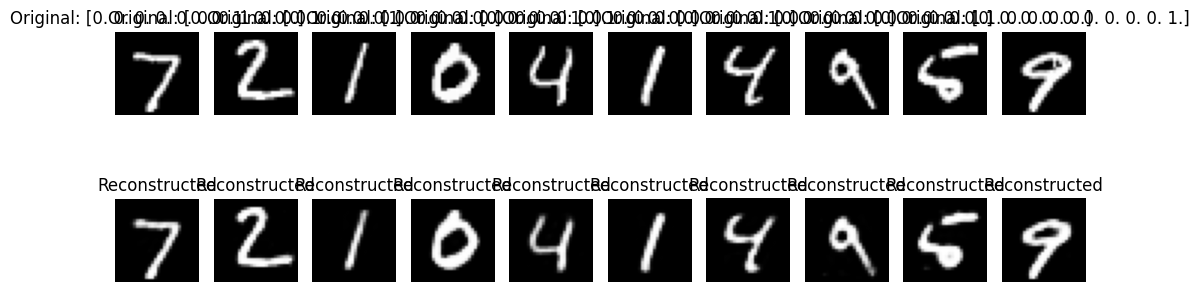

In [66]:
# Visualize the original and reconstructed images
n = 10  # Number of images to visualize
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original: {y_test[i]}')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstruction[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.tight_layout()
plt.show()

-   Save the autoencoder model

In [54]:
# Save the autoencoder model
autoencoder.save('autoencoder_mnist.h5')
print("Autoencoder model saved as 'autoencoder_mnist.h5'.")

Autoencoder model saved as 'autoencoder_mnist.h5'.


## Hands-on Exercise

Repeat the above steps with the CIFAR-10 dataset, which consists of 32x32 color images in 10 classes. The goal is to compress the images into a lower-dimensional representation and then reconstruct the original images.

-   Load the CIFAR-10 dataset

In [67]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

-   Visualize some samples from the CIFAR-10 dataset

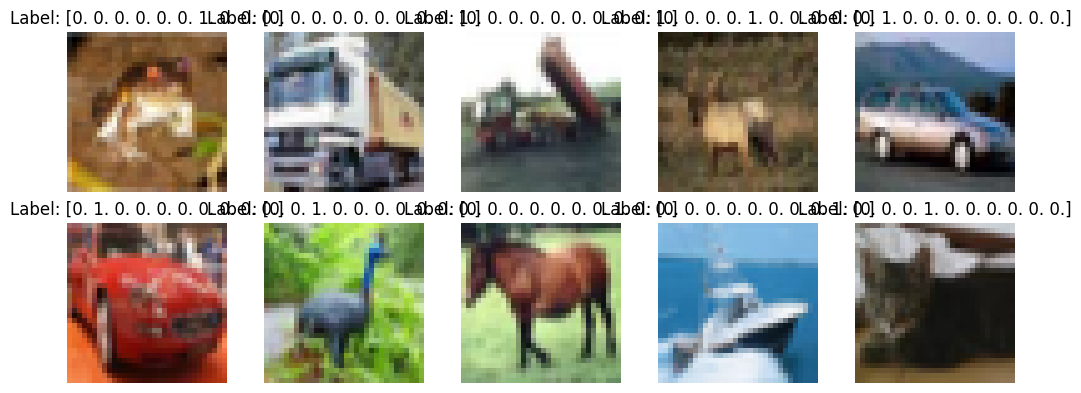

In [68]:
# Visualize some samples from the CIFAR-10 dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

-   Define the autoencoder architecture for CIFAR-10

In [96]:
# Define the encoder for CIFAR-10
input_img = Input(shape=(32, 32, 3))
# Add a Convolutional layer for better feature extraction
from tensorflow.keras.layers import Conv2D, MaxPooling2D
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(512, activation='relu')(x)

# Define the decoder for CIFAR-10
x = Dense(2048, activation='sigmoid')(encoded)
# # Add a Convolutional transpose layer to reconstruct the image
from tensorflow.keras.layers import Reshape, UpSampling2D
x = Reshape((4, 4, 128))(x)  # Reshape to match the last pooling layer's output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# Reshape the output to match the original image dimensions
decoded = Reshape((32, 32, 3))(x)

# Create the autoencoder model for CIFAR-10
autoencoder_cifar = Model(input_img, decoded)
autoencoder_cifar.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_cifar.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_25 (Reshape)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_26 (Reshape)            │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433,667 (9.28 MB)

 Trainable params: 2,433,667 (9.28 MB)

 Non-trainable params: 0 (0.00 B)

-   Train the autoencoder on CIFAR-10

In [97]:
# Train the autoencoder on CIFAR-10
autoencoder_cifar.fit(X_train,
                      X_train,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_split=0.2)
print("Autoencoder for CIFAR-10 training completed.")

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.6631 - val_loss: 0.6093
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6075 - val_loss: 0.5987
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5958 - val_loss: 0.5896
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5869 - val_loss: 0.5853
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5840 - val_loss: 0.5838
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5811 - val_loss: 0.5801
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5798 - val_loss: 0.5831
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5788 - val_loss: 0.5778
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5768 - val_loss: 0.5764
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5760 - val_loss: 0.5754
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5752 - val_loss: 0.5749
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

-   Evaluate the autoencoder on CIFAR-10

In [94]:
# Evaluate the autoencoder on CIFAR-10
reconstruction_cifar = autoencoder_cifar.predict(X_test)
reconstruction_error_cifar = np.mean(np.square(X_test - reconstruction_cifar))
print(f'Reconstruction Error for CIFAR-10: {reconstruction_error_cifar:.4f}')

2025-07-10 11:36:43.272256: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.21 = (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0} %bitcast.404, f32[32,3,3,3]{3,2,1,0} %bitcast.411, f32[32]{0} %bitcast.413), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_21_1/conv2d_19_1/convolution" source_file="/data/venvs/ml-workshop/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-10 11:36:43.285909: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted p

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Reconstruction Error for CIFAR-10: 0.0077


-   Visualize the reconstructed images from CIFAR-10

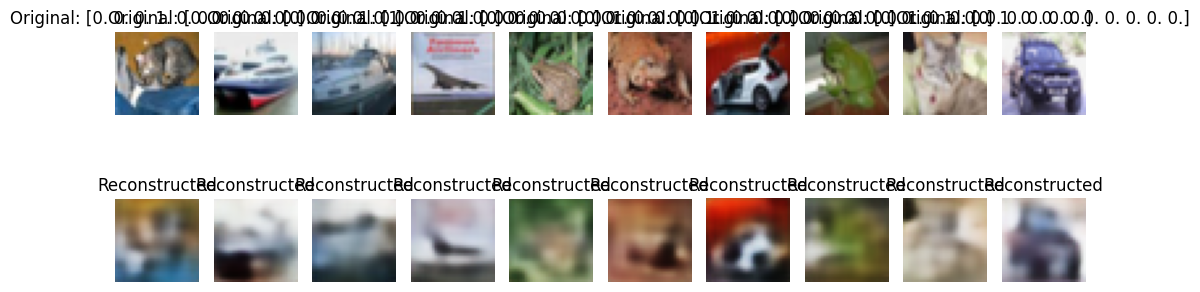

In [95]:
# Visualize the original and reconstructed images from CIFAR-10
n = 10  # Number of images to visualize
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Original: {y_test[i]}')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstruction_cifar[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.tight_layout()
plt.show()